In [ ]:
!pip install xgboost

In [ ]:
# data analysis and visulaization
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import pandas as pd
import numpy as np
# preprocessing and modeling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
# for saving model
import pickle

In [ ]:
# load dataset
df = pd.read_csv('/content/heart_disease.csv')
# display top 5 row
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# display last 5 rows
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 303
Number of Columns 14


In [ ]:
df.isnull().sum()
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


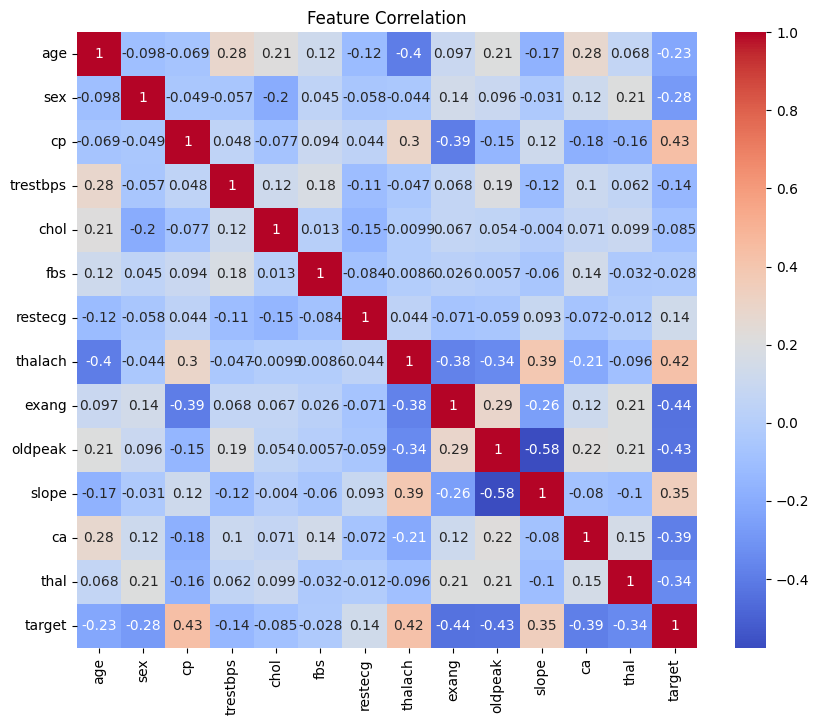

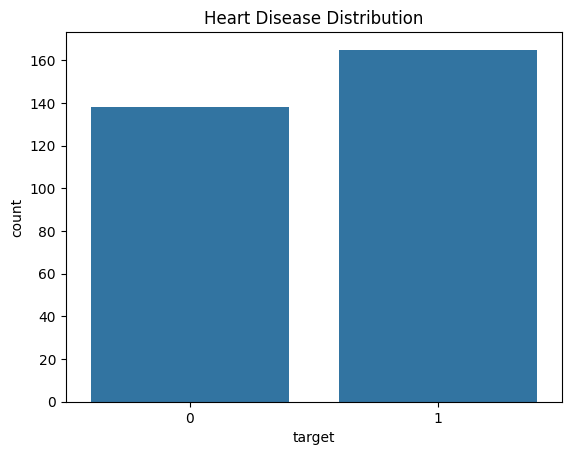

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

# Target distribution
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.show()

In [ ]:
# convert categorical columns into numeric
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# independent & dependent features
x = df.drop('target',axis=1)
y = df['target']
# split dataset
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 40)
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# XGBoost classifier
model = xgb.XGBClassifier()
params = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
}
grid = GridSearchCV(model, params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


Cross-Validation Accuracy: 0.8142006802721088
Test Accuracy: 0.8032786885245902
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        26
           1       0.83      0.83      0.83        35

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



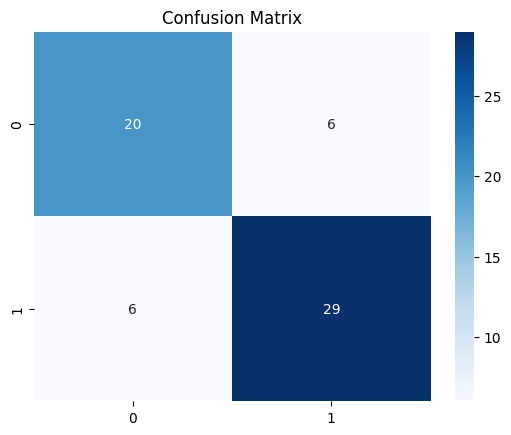

In [ ]:
# cross validation score
cv_score = cross_val_score(best_model, X_train, y_train, cv=5)
print("Cross-Validation Accuracy:", cv_score.mean())
#test prediction
y_pred = best_model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save Trained Model
pickle.dump(best_model, open('model.pkl', 'wb'))
# save scaler
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [ ]:
from flask import Flask, request, render_template
import pickle

app = Flask(__name__)

# Load saved model and scaler
model = pickle.load(open('model.pkl', 'rb'))
scaler = pickle.load(open('scaler.pkl', 'rb'))

@app.route('/')
def home():
    return """
    <h2>Heart Disease Prediction Form</h2>
    <form action="/predict" method="post">
        Enter 11 Feature values (Comma separated):<br><br>
        <input type="text" name="features">
        <input type="submit">
    </form>
    """

@app.route('/predict', methods=['POST'])
def predict():
    data = request.form['features']
    data = [float(x) for x in data.split(',')]  # Convert the input into a list of floats
    final_data = scaler.transform([data])  # Scaling the input
    output = model.predict(final_data)  # Predicting the output

    result = "Heart Disease" if output[0] == 1 else "No Heart Disease"

    return f"<h2>Prediction: {result}</h2>"

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [ ]:
# Save Trained Model
pickle.dump(best_model, open('heart_disease_model.pkl', 'wb'))
# save scaler
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [ ]:
# User Manual Input as Dictionary
user_input = {
    'Age': int(input("Age (e.g. 45): ")),
    'Sex': 1 if int(input("Sex (0 = Male, 0 = Female): ")) == 1 else 0,
    'ChestPainType': ['TA', 'ATA', 'ASY'][int(input("Chest Pain Type (0=TA, 1=ATA, 2=ASY): "))],
    'RestingBP': int(input("Resting Blood Pressure: ")),
    'Cholesterol': int(input("Cholesterol Level: ")),
    'FastingBS': 1 if int(input("Fasting Blood Sugar (1 = True; 0 = False): ")) == 1 else 0,
    'RestingECG': ['Normal', 'ST', 'LVH'][int(input("Resting ECG (0=Normal, 1=ST, 2=LVH): "))],
    'MaxHR': int(input("Maximum Heart Rate Achieved: ")),
    'ExerciseAngina': 1 if int(input("Exercise Induced Angina (1 = Yes, 0 = No): ")) == 1 else 0,
    'Oldpeak': float(input("Oldpeak (e.g. 1.5): ")),
    'ST_Slope': ['Up', 'Flat', 'Down'][int(input("ST Slope (0=Up, 1=Flat, 2=Down): "))]
}

# Convert to DataFrame
input_df = pd.DataFrame([user_input])
X = df.drop(columns='target')  # Define X (features)
y = df['target']  # Define y (target)

# One-hot encoding using same logic as training
encoded_input = pd.get_dummies(input_df)

# Align with training data
encoded_input = encoded_input.reindex(columns=X.columns, fill_value=0)
# Scale input
scaled_input = scaler.transform(encoded_input)

# Predict
prediction = best_model.predict(scaled_input)

# Output result
print("\n--- Prediction Result ---")
if prediction[0] == 1:
    print("** High Risk: The patient may have Heart Disease. **")
else:
    print("** Low Risk: No Heart Disease detected. **")